# Approximating $\pi$ with Monte Carlo methods

In this notebook, we will see how we can approximate the correct value of the constant $\pi$ using Monte Carlo methods.

Let us start from two facts.
Consider a circle inscribed in a square.
The radius $r$ of the circle is half the length of the square's side $\ell$.

- The area of the circle is $A_c \equiv \pi \cdot r^2$.
- The area of the square is $A_s \equiv \ell^2 = {(2 r)}^2 = 4 r^2$.

Hence, we have that $A_c / A_s = \pi / 4$.
This holds regardless of the radius length $r$ (and also of the square's side $\ell$).

Numerically, we can imagine drawing random numbers in the two-dimensional plane $X \times Y = [-1, 1] \times [-1, 1]$ (hence the circle has radius $r=1$).
Each random draw $(x, y)$ counts as a point on the unit square.
We then count the number of points that are inside the unit circle.
We also count the number of all points we draw.
The ratio will be four times $\pi$.

The radius of the circle $r$ is only relevant when checking whether a point lies inside or outside the circle.
We will indeed check using the formula $x^2 + y^2 \leq r^2$.

We only need `numpy` for this example.
However, a nice graphical representation helps understanding the point behind Monte Carlo methods: the higher the number of synthetic experiments, the more accurate the approximation/estimation.
Hence, we will also use `matplotlib`.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time

# Use LaTeX to render text
plt.rc('text', usetex=True)

# Do not run the following if not on Jupyter
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')  # uses SVG graphics on inline plots

The package `numpy` has a set of functions to draw from random distributions.
Here, we need to draw from uniform distributions over the interval $[-1, 1]$.
We can do this using [`numpy.random.uniform()`](https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.random.html).

The way we go around this is the following.
At each iteration:

- We draw a $x$-coordinate from $\mathcal{U}_{[-1,1]}$.
- We draw a $y$-coordinate from $\mathcal{U}_{[-1,1]}$.
- We keep track of how many points we drew, in total.
- We verify whether $(x, y)$ is in the unit circle using the Euclidean distance:
  - If yes, then we increase the counter of points inside the circle.
  - If not, then we continue with the iteration.
- We keep track of the points, storing the $x$ and $y$ coordinates and by storing the current approximation of $\pi$.
- We move to the next iteration.

However, before we begin the iteration, we need to:

- Define the number of Monte Carlo repetitions.
- Define empty lists to store the $x$ and $y$ coordinates and the current estimate of $\pi$.
- Define two integers, starting from zero, that will keep the counts of points we draw, both in total and only inside the circle.
- (Optional) Keep track of time spent in the algorithm.

In [2]:
total_points = 0
inside_points = 0

r = 1.0  # radius of the circle
t = int( 1e7 )  # no. of Monte Carlo experiments

X = []  # list of all x-coordinates
Y = []  # list of all y-coordinates
pi = []  # list of all candidate pi's

start = time()

for i in range(t):
    x = np.random.uniform(low=-r, high=r)  # draw from U[-r,r]
    y = np.random.uniform(low=-r, high=r)  # draw from U[-r,r]
    
    total_points += 1  # will eventually be equal to `t`
    
    inside = ( x**2 + y**2 < r**2 )  # will be boolean
    if inside:
        inside_points += 1
        
    X.append(x)
    Y.append(Y)
    pi.append( 4 * inside_points / total_points )

stop = time()

In [3]:
print('Time elapsed: {:.3f} seconds'.format(stop - start))
print('Latest pi approximation:     {:.6f}'.format(pi[-1]))
print('Most accurate pi (in numpy): {:.6f}'.format(np.pi))

Time elapsed: 60.086 seconds
Latest pi approximation:     3.142170
Most accurate pi (in numpy): 3.141593


Now that we obtained the approximation, we can see how we converged to the result.

In [4]:
simul_prop = {  # properties for the simulation line
    'color': 'black',
    'linewidth': 0.5,
    'label': r'Current $\pi$ approx.'
}
refli_prop = {  # properties for the reference line
    'color': 'red',
    'linewidth': 1.5,
    'linestyle': 'dashed',
    'label': r'$\pi$'
}

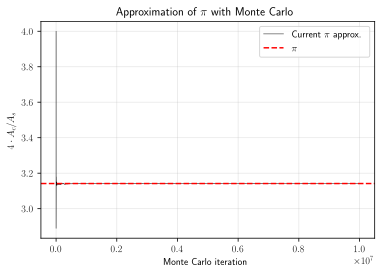

In [5]:
fig, ax = plt.subplots()
ax.plot(range(t), pi, **simul_prop)
ax.axhline(np.pi, **refli_prop)
ax.legend(loc='upper right')
ax.grid(alpha=0.3)
ax.set_xlabel(r'Monte Carlo iteration')
ax.set_ylabel(r'$4 \cdot A_c / A_s$')
ax.set_title(r'Approximation of $\pi$ with Monte Carlo')
plt.show()whether

Here we observe that the first few approximations are way off target.
This is a common phenomenon in Monte Carlo settings.
We can get rid of the first few observations, by imputing them to _burn-in_ of the algorithm.
Removing them will make sure that what we look at does not depend on the initial condition.

<sub>
In our case, the initial condition is <code>inside_points / total_points</code> = <code>1 / 1</code> = <code>1</code>.
</sub>

In [6]:
burn_in = 100000

pi_burned = pi
for i in range(burn_in):
    pi_burned[i] = np.nan

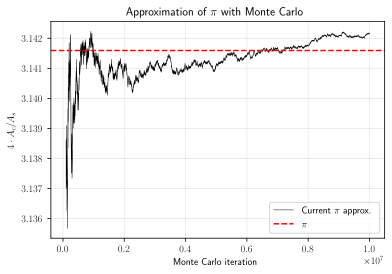

In [8]:
fig2, ax2 = plt.subplots()
ax2.plot(range(t), pi_burned, **simul_prop)
ax2.axhline(np.pi, **refli_prop)
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)
ax2.set_xlabel(r'Monte Carlo iteration')
ax2.set_ylabel(r'$4 \cdot A_c / A_s$')
ax2.set_title(r'Approximation of $\pi$ with Monte Carlo')
plt.show()